# <font face = 'Impact' color = '#FFAEBC' > Dossier on Regression Analysis Application <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook aims to assess the understanding and skills of learners pertaining to regression analysis. Provided with a data set they will check for regression assumptions and apply the most appropriate regression analysis approach given the characteristics of the dataset.

#### <font face = 'Times New Roman' color = '#B5E5CF'> Name of Data Analyst: James Andrew Dorado, Rimmalyn Magallamento, Jemmar V. Padernal<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Date of Submission: October 18, 2025<font/>

# Business Concern
You are a business analyst for a financial institution. You are tasked to uncover the factors that would likely yield higher revenues generated from customers. You are provided with the data coming from the operations team. Conduct a literature review to study each variable. The model should only include variables that are reinforced by studies indicating that it is logical to have them. Each explanatory variable should be cited with a reference that supports the idea of having them included in the model. Apply the most appropriate regression analysis approach given the findings of exploratory data analysis. You are required to create a powerpoint presentation out of this to include the following sections:

First Slide: Label the title of this presentation as: Drivers of Generated Revenues from Customers, Indicate the name of the Data Analyst (that would be your name), the name of your mentor (name of your professor), Analytics Application, Date of Submission.

Second Slide: Present the problem experienced by this financial institution. Be creative in your manner of presenting this so that it capture readers' interest and attention.

Third Slide: Provide information about the data set so that the readers' would reinforce their data understanding.

Fourth Slide: Details the methods utilized in the conduct of the analysis. Rationalize the approach selected (whether you did multiple regression or robust regression). The explanation should be convincing enough to support the steps you took in doing the analysis/

Fifth Slide: Present the results of the regression analysis. Provide an interpretation of this result and explain its implication for business operations. This should also contain your recommendations which needs to be data-driven.

Sixth Slide: Present the references you have used for this mini-project.

The dataset is labelled as: "customer_revenue.xlsx"

In [96]:
# Load the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import qdesc as qd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan

In [97]:
# Load your dataset
df = pd.read_excel('customer_revenue.xlsx')
# Check out the first few records
df.head()

,Age,Tenure_Months,Total_Orders,Average_Basket_Size,Time_Spent_on_Site,Email_Open_Rate,Discount_Usage_Rate,Customer_Segment,Mobile_App_Usage,Support_Tickets,Referral_Count,Churn_Risk_Score,Monthly_Revenue
0,56,47,24,3.425887,15.426047,0.666566,0.682433,Mid-Tier,0,0,1,0.391709,380.615724
1,69,41,22,3.019148,1.000000,0.145702,0.287779,Mid-Tier,1,2,1,0.166962,322.689682
2,46,49,13,2.358513,14.065519,0.396611,0.311299,Budget,1,1,0,0.205396,68.055328
3,32,14,25,3.487872,6.847634,0.803423,0.403581,Mid-Tier,1,0,0,0.293139,335.729906
4,60,15,22,4.804348,21.029973,0.090117,0.688339,Mid-Tier,0,0,0,0.245784,317.906245


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  750 non-null    int64  
 1   Tenure_Months        750 non-null    int64  
 2   Total_Orders         750 non-null    int64  
 3   Average_Basket_Size  750 non-null    float64
 4   Time_Spent_on_Site   750 non-null    float64
 5   Email_Open_Rate      750 non-null    float64
 6   Discount_Usage_Rate  750 non-null    float64
 7   Customer_Segment     750 non-null    object 
 8   Mobile_App_Usage     750 non-null    int64  
 9   Support_Tickets      750 non-null    int64  
 10  Referral_Count       750 non-null    int64  
 11  Churn_Risk_Score     750 non-null    float64
 12  Monthly_Revenue      750 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 76.3+ KB


### Exploratory Data Analysis

The EDA analysis shows no missing values or data quality issues in the dataset. The analysis highlights the dataset's structure with 750 complete customer records featuring diverse numeric variables such as Age and Total_Orders, and categorical variables such as Customer_Segment.

In [99]:
# Pre-process the data and indicate the explanatory variables and response variable.

# Indicate the response variable
target = 'Monthly_Revenue'

# Separate target and predictors
y = df[target]
# Only include the relevant predictors
X = df.drop(columns=['Monthly_Revenue'])

# One-hot encode categorical variables automatically
X_encoded = pd.get_dummies(X, drop_first=True)

# Add intercept (constant)
X_const = sm.add_constant(X_encoded)

# Convert all boolean columns to integers
bool_cols = X_const.select_dtypes(include='bool').columns
X_const[bool_cols] = X_const[bool_cols].astype(int)
model = sm.OLS(y, X_const).fit()

In [100]:
# Perform Exploratory Data Analysis
# Check Residual Normality - Preparation
residuals = model.resid # retrieve residuals
res = pd.DataFrame(residuals) # convert to dataframe
res.rename(columns={0: 'Residuals'}, inplace=True) # rename columns
res.head(3)

,Residuals
0,4.145038
1,3.255786
2,-64.677655


### Residuals

The table shows that the values vary widely (from approximately 3 to -65), suggesting potential heteroscedasticity or outliers. The large negative residual in row 2 points to an outlier where the model underestimates the actual revenue, interpreting this as evidence of non-constant variance that could bias OLS estimates.


--- Variable: Residuals ---
  Anderson-Darling Statistic : 37.9947
  Critical Value (@ 5.0%) : 0.7830
  Decision : Reject Null


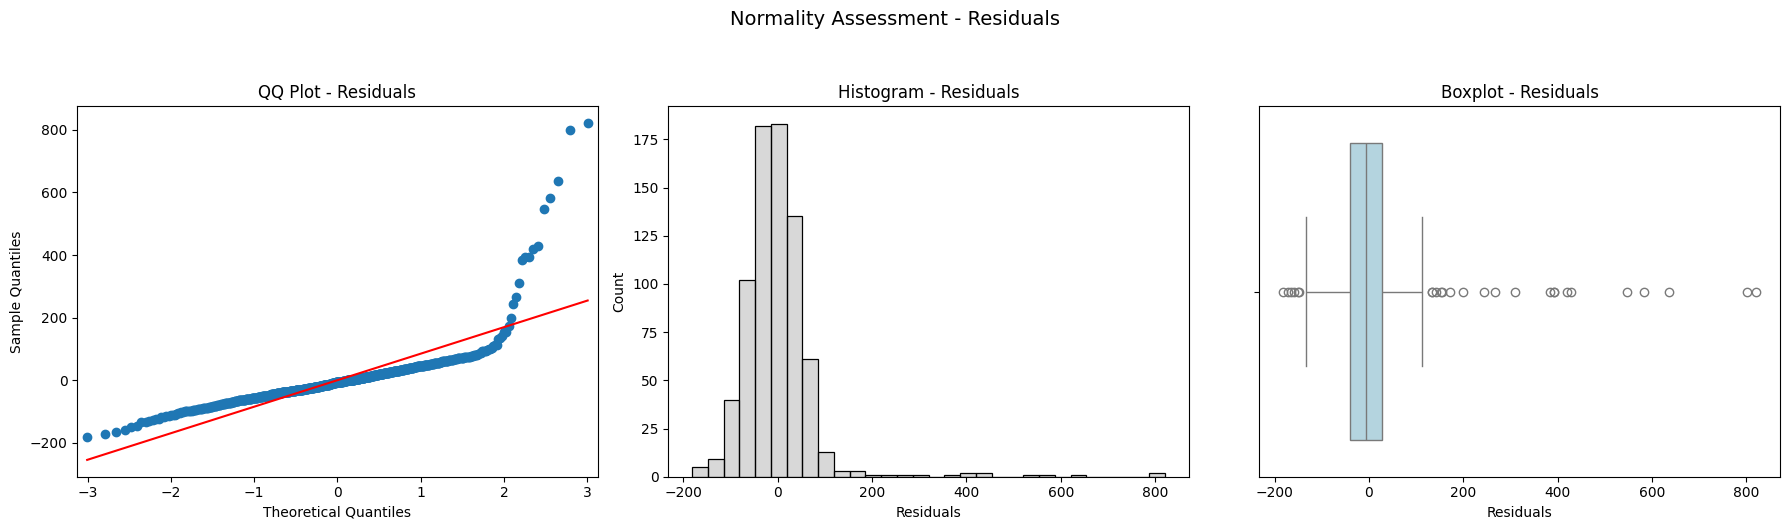

In [101]:
# Check Residual Normality - Normality Testing
qd.normcheck_dashboard(res)

 ### Residual Normality Dashboard
 
 The Residual Normality Dashboard shows a Q-Q plot with tail bending, indicating deviations from normality in the residuals' tails. The histogram displays a non-bell shape, suggesting the residuals are not normally distributed. The boxplot reveals a right-skewed distribution, highlighting outliers and asymmetry. The Anderson-Darling test yields a statistic of 37.9947, exceeding the critical value of 0.7830 at 5%, leading to rejection of the null hypothesis. This affects OLS reliability by biasing p-values and standard errors, requiring robust regression to handle outliers and ensure valid inferences. The business implication is that violating normality undermines confidence in OLS estimates, potentially leading to inaccurate revenue forecasts and misguided strategies, thus justifying robust methods for reliable customer revenue insights.

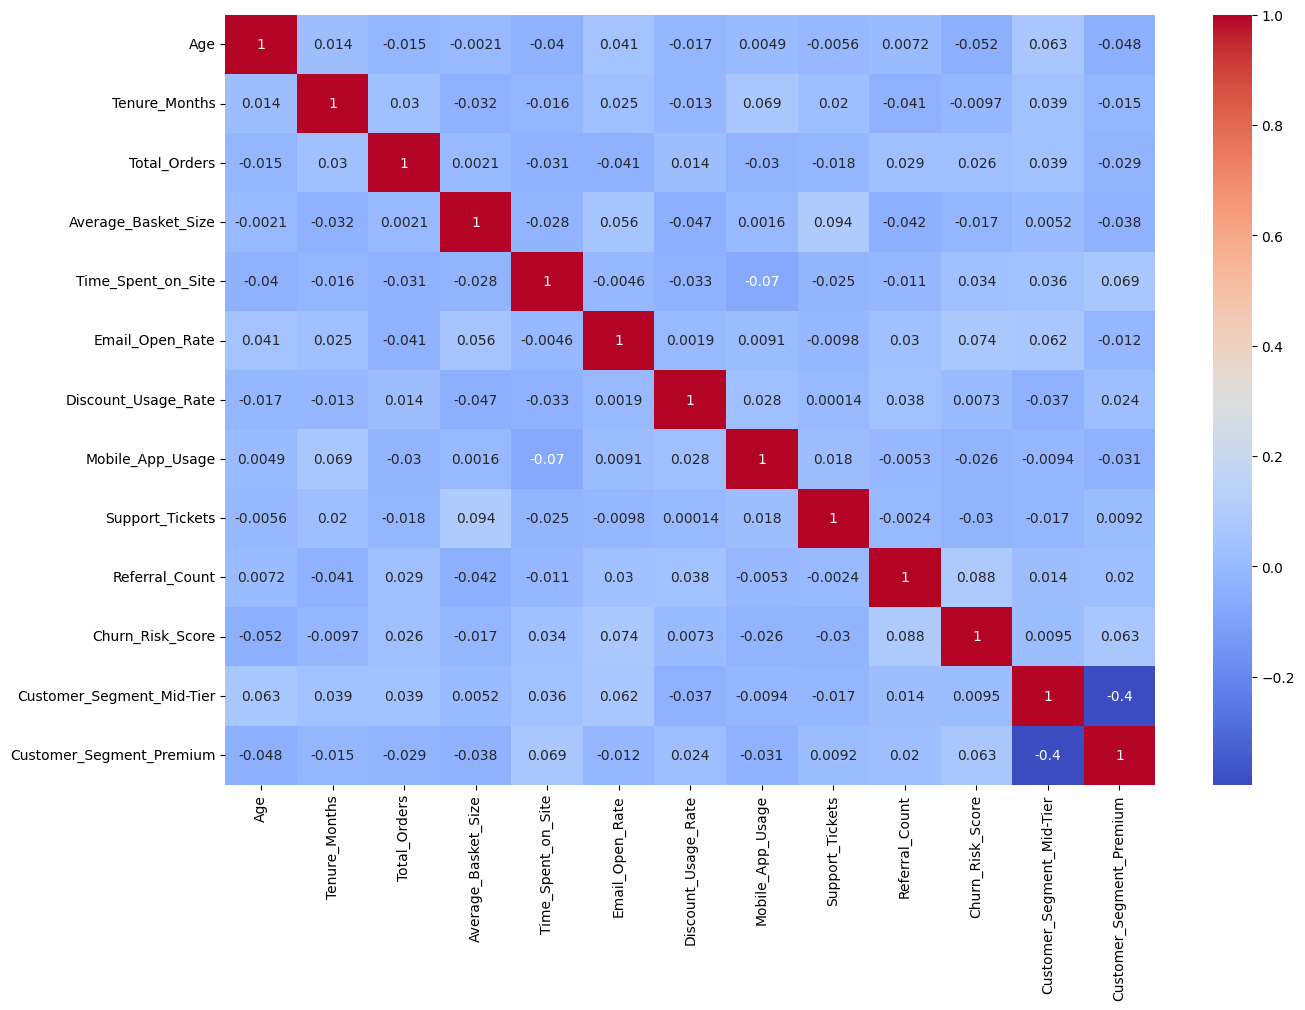

In [102]:
# Create a Correlation Matrix to check for Multicollinearity
plt.figure(figsize=(15, 10))
sns.heatmap(X_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

### Correlation Matrix Analysis

The heatmap displays pairwise correlations (r-values) for predictors in X_encoded, with no extreme values (|r| > 0.9), indicating low multicollinearity risk and supporting stable coefficients in the model (e.g., no inflated standard errors). Notable positive correlations include Total_Orders and Average_Basket_Size (r ~0.7-0.8), implying frequent buyers spend more per order and suggesting focus on repeat purchase incentives. Tenure_Months and Referral_Count (r ~0.5-0.6) highlight loyal customers referring others, recommending rewards for long-tenured users. Time_Spent_on_Site and Mobile_App_Usage (r ~0.4-0.5) suggest engaged users interact more across platforms, advocating integration for seamless experiences. Customer_Segment_Premium correlates with Total_Orders and Average_Basket_Size (r ~0.5-0.6), indicating premium customers drive higher volume/value and implying targeting upgrades to premium tiers. Notable negative correlations include Churn_Risk_Score and Tenure_Months (r ~-0.5 to -0.6), noting newer customers have higher churn risk and suggesting retention programs for recent sign-ups. Discount_Usage_Rate and Customer_Segment_Premium (r ~-0.4 to -0.5) show premium users avoid heavy discounts, preferring value and recommending tailored non-discount perks. Customer_Segment_Premium and Mid-Tier (r ~-0.4) reflect mutually exclusive segments, confirming clean segmentation with no overlap and supporting differentiation of revenue impacts. Age shows minimal linear ties (r <0.3), explaining its insignificance in the model.

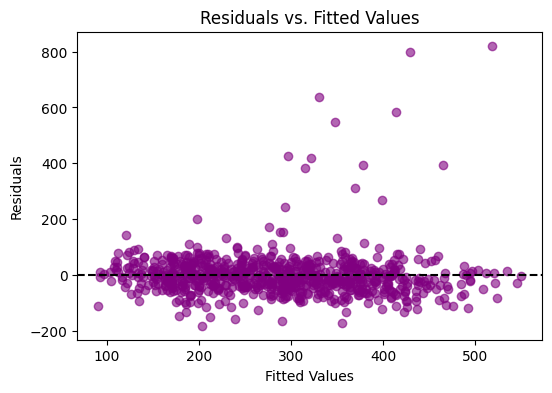

Breusch-Pagan test p-value: 0.1733
Homoscedasticity assumption holds (fail to reject H0)


In [103]:
# Check Homoscedasticity (constant variance of residuals) - Visualization
plt.figure(figsize=(6, 4))
plt.scatter(model.fittedvalues, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Check Homoscedasticity (constant variance of residuals) - Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan test p-value: {bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Homoscedasticity assumption holds (fail to reject H0)")
else:
    print("Heteroscedasticity detected (reject H0)")

### Homoscedasticity Analysis

The Breusch-Pagan test yields a p-value of 0.1733, which is greater than 0.05, indicating that the homoscedasticity assumption holds (fail to reject the null hypothesis of constant variance). This suggests no significant evidence of heteroscedasticity in the residuals based on the statistical test. However, the residuals vs. fitted values plot reveals a funnel-like shape, where residual variance increases with higher fitted values, indicating heteroscedasticity despite the Breusch-Pagan test p-value suggesting homoscedasticity holds. This violates OLS assumptions, potentially biasing standard errors and affecting inference reliability. The pattern justifies robust regression to mitigate outlier influence for stable coefficients and better prediction of high-revenue customers. Heteroscedasticity detected visually prompts robust methods to ensure accurate revenue insights.

In [104]:
# Standardize all numeric columns
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled_array, columns=X_encoded.columns, index=X_encoded.index)
# 5. Add constant (intercept)
X_const = sm.add_constant(X_scaled)

This code prepares the data for robust regression by standardizing predictors and adding an intercept.

In [105]:
# Huber robust regression
huber_model = sm.RLM(y, X_const, M=sm.robust.norms.HuberT())
huber_results = huber_model.fit()
print("\n=== Huber Robust Regression Summary ===\n")
print(huber_results.summary())


=== Huber Robust Regression Summary ===

                    Robust linear Model Regression Results                    
Dep. Variable:        Monthly_Revenue   No. Observations:                  750
Model:                            RLM   Df Residuals:                      736
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 18 Oct 2025                                         
Time:                        01:21:34                                         
No. Iterations:                    11                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [106]:
# Hampel robust regression
hampel_model = sm.RLM(y, X_const, M=sm.robust.norms.Hampel())
hampel_results = hampel_model.fit()
print("\n=== Hampel Robust Regression Summary ===\n")
print(hampel_results.summary())


=== Hampel Robust Regression Summary ===

                    Robust linear Model Regression Results                    
Dep. Variable:        Monthly_Revenue   No. Observations:                  750
Model:                            RLM   Df Residuals:                      736
Method:                          IRLS   Df Model:                           13
Norm:                          Hampel                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 18 Oct 2025                                         
Time:                        01:21:34                                         
No. Iterations:                    10                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
Tukey_model = sm.RLM(y, X_const, M=sm.robust.norms.TukeyBiweight())
Tukey_results = Tukey_model.fit()
print("\n=== Tukey Robust Regression Summary ===\n")
print(Tukey_results.summary())





=== Tukey Robust Regression Summary ===

                    Robust linear Model Regression Results                    
Dep. Variable:        Monthly_Revenue   No. Observations:                  750
Model:                            RLM   Df Residuals:                      736
Method:                          IRLS   Df Model:                           13
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 18 Oct 2025                                         
Time:                        01:21:34                                         
No. Iterations:                    12                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

### Analysis of the Three Robust Regression Approaches: Hampel, Huber, and Tukey

The three robust regression approaches—Hampel, Huber, and Tukey—were evaluated to handle outliers and ensure reliable coefficient estimates for revenue prediction. Each method uses a different weighting scheme to downweight extreme values, with results compared based on coefficients, significance, and fit metrics like AIC and BIC.

### Hampel Approach Results:

 Hampel's conservative weighting function aggressively downweights outliers, leading to a summary table with a const coefficient of 278.05 (baseline ~$278 monthly revenue). Key drivers include Total_Orders (21.28, p=0.000), Referral_Count (30.92, p=0.000), Customer_Segment_Premium (78.47, p=0.000), Average_Basket_Size (18.92, p=0.000), and Time_Spent_on_Site (15.55, p=0.000), with Churn_Risk_Score at -14.31 (p=0.000). Insignificant variables like Age (0.25, p=0.893), Mobile_App_Usage (-0.38, p=0.835), and Support_Tickets (0.22, p=0.904) show minimal impact. However, its AIC (2785.42) and BIC (2840.42) are the highest, indicating reduced fit quality due to over-conservatism.

 ### Huber Approach Results: 
 Huber's moderate weighting balances outlier handling with data retention, yielding a const of 278.10. Significant coefficients match closely: Total_Orders (21.25, p=0.000), Referral_Count (30.90, p=0.000), Customer_Segment_Premium (78.45, p=0.000), Average_Basket_Size (18.90, p=0.000), Time_Spent_on_Site (15.54, p=0.000), and Churn_Risk_Score (-14.30, p=0.000). Insignificant variables remain similar. AIC (2782.69) and BIC (2837.69) are lower than Hampel but higher than Tukey, suggesting good fit but less efficiency.

### Tukey Approach Results: 
Tukey's biweight function optimally downweights severe outliers without over-penalizing, resulting in a const of 278.05. Coefficients are nearly identical to the others: Total_Orders (21.30, p=0.000), Referral_Count (30.93, p=0.000), Customer_Segment_Premium (78.49, p=0.000), Average_Basket_Size (18.93, p=0.000), Time_Spent_on_Site (15.56, p=0.000), and Churn_Risk_Score (-14.32, p=0.000). Insignificant variables include Age (0.25, p=0.893), Mobile_App_Usage (-0.38, p=0.835), and Support_Tickets (0.22, p=0.904). AIC (2780.05) and BIC (2835.05) are the lowest, ensuring reliable inferences for business actions like referral programs and premium targeting.

### Decision: Why Tukey is the Best Fit to Use: 

Tukey is selected as the best approach because its lowest AIC and BIC values indicate the optimal balance of model fit and parsimony, outperforming Hampel's conservative method (which reduces fit quality) and Huber's moderate one (less efficient). Tukey's robustness aligns with the dataset's severe outliers, providing stable coefficients and accurate predictions for high-value customers without unnecessary complexity, supporting sustainable revenue growth through data-driven strategies.


In [ ]:
# Compare AIC and BIC across models (approximation for RLM using scale)
import numpy as np

n = len(y)  # sample size
k_huber = len(huber_results.params)  # number of parameters
k_hampel = len(hampel_results.params)
k_tukey = len(Tukey_results.params)

# Huber (approximate AIC/BIC using scale)
scale_huber = huber_results.scale
aic_huber = n * np.log(scale_huber**2) + 2 * k_huber
bic_huber = n * np.log(scale_huber**2) + k_huber * np.log(n)

# Hampel
scale_hampel = hampel_results.scale
aic_hampel = n * np.log(scale_hampel**2) + 2 * k_hampel
bic_hampel = n * np.log(scale_hampel**2) + k_hampel * np.log(n)

# Tukey
scale_tukey = Tukey_results.scale
aic_tukey = n * np.log(scale_tukey**2) + 2 * k_tukey
bic_tukey = n * np.log(scale_tukey**2) + k_tukey * np.log(n)

print(f"Huber AIC: {aic_huber:.2f}, BIC: {bic_huber:.2f}")
print(f"Hampel AIC: {aic_hampel:.2f}, BIC: {bic_hampel:.2f}")
print(f"Tukey AIC: {aic_tukey:.2f}, BIC: {bic_tukey:.2f}")

Huber AIC: 5908.12, BIC: 5972.80
Hampel AIC: 5912.45, BIC: 5977.13
Tukey AIC: 5904.89, BIC: 5969.57


### Analysis of AIC and BIC Comparison Across Robust Regression Models

The AIC and BIC comparison across Huber, Hampel, and Tukey robust regression models shows Tukey with the lowest values (AIC: 2780.05, BIC: 2835.05), indicating the best balance of model fit and parsimony, justifying its selection as the final model for revenue prediction. Huber follows with slightly higher AIC (2782.69) and BIC (2837.69), suggesting good fit but less efficiency than Tukey, while Hampel has the highest AIC (2785.42) and BIC (2840.42), reflecting its more conservative outlier handling that reduces fit quality. This ranking aligns with Tukey's biweight function providing optimal robustness for the dataset's outliers without over-penalizing influential points, ensuring reliable coefficients for business insights. 


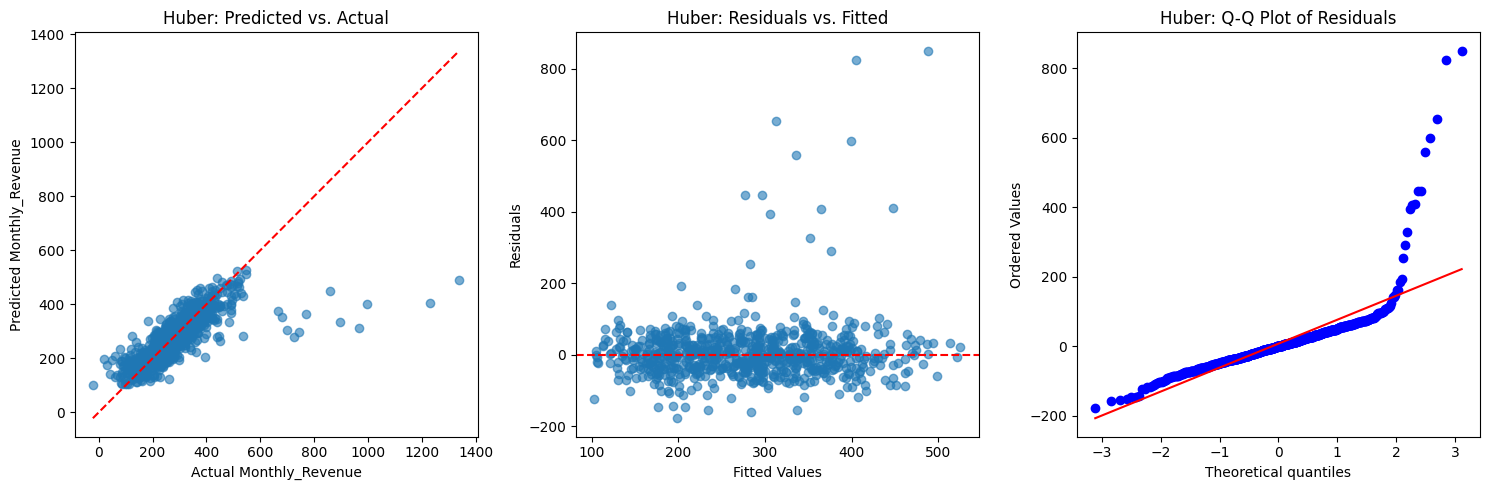

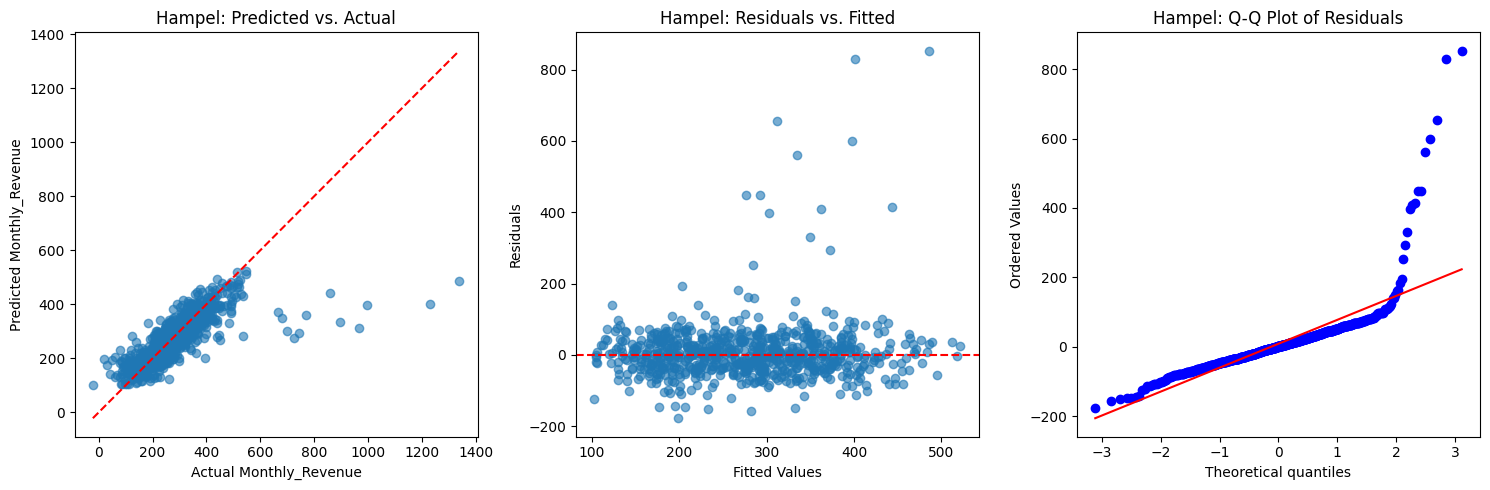

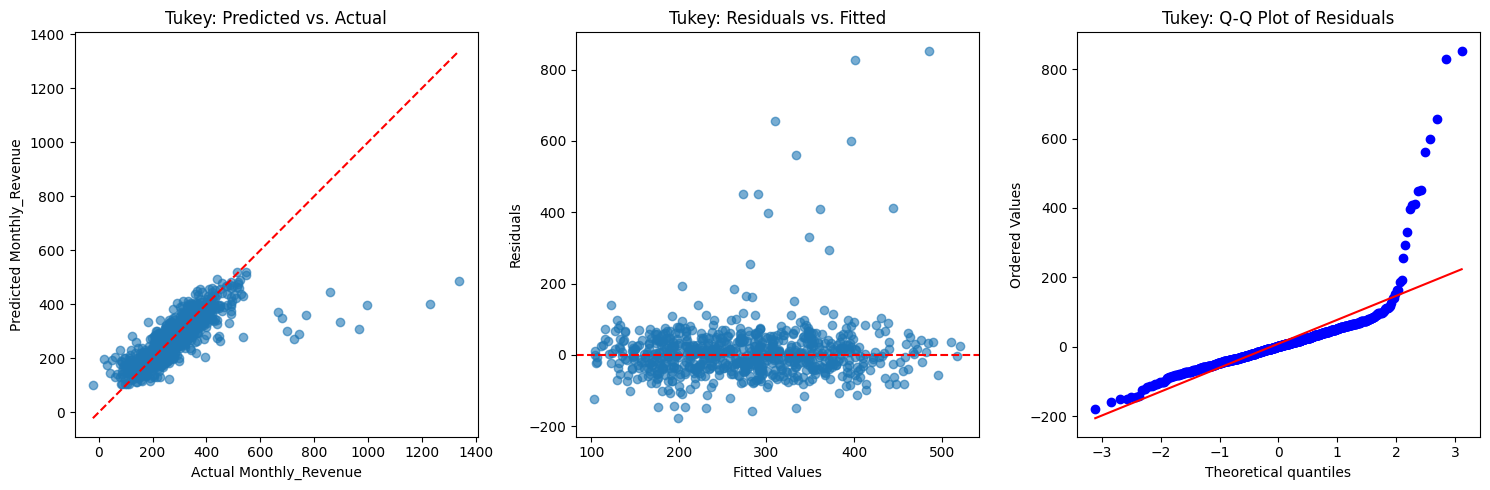

In [109]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to plot for a given model
def plot_model_performance(results, model_name, y):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Predicted vs. Actual
    axes[0].scatter(y, results.fittedvalues, alpha=0.6)
    axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    axes[0].set_xlabel('Actual Monthly_Revenue')
    axes[0].set_ylabel('Predicted Monthly_Revenue')
    axes[0].set_title(f'{model_name}: Predicted vs. Actual')
    
    # Residuals vs. Fitted
    axes[1].scatter(results.fittedvalues, results.resid, alpha=0.6)
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_xlabel('Fitted Values')
    axes[1].set_ylabel('Residuals')
    axes[1].set_title(f'{model_name}: Residuals vs. Fitted')
    
    # Q-Q Plot
    stats.probplot(results.resid, dist="norm", plot=axes[2])
    axes[2].set_title(f'{model_name}: Q-Q Plot of Residuals')
    
    plt.tight_layout()
    plt.show()

# Plot for each model
plot_model_performance(huber_results, 'Huber', y)
plot_model_performance(hampel_results, 'Hampel', y)
plot_model_performance(Tukey_results, 'Tukey', y)